In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AIML_IITG/Datasets/sonar_knn.csv")

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.shape

(208, 61)

In [ ]:
df.isnull().sum()

,0
Freq_1,0
Freq_2,0
Freq_3,0
Freq_4,0
Freq_5,0
...,...
Freq_57,0
Freq_58,0
Freq_59,0
Freq_60,0


In [ ]:
X = df.drop("Label",axis=1)
y = df["Label"]

In [ ]:
X.shape

(208, 60)

In [ ]:
y.shape

(208,)

In [ ]:
df["Label"].value_counts()

,count
Label,
M,111
R,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [ ]:
df["Target"]=df["Label"].map({"R":0,"M":1})

In [ ]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [ ]:
y = df["Target"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
sc = StandardScaler()
knn = KNeighborsClassifier()
operations = [("sc",sc),("knn",knn)]
pipe = Pipeline(operations)

In [ ]:
pipe

Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
n_range = list(range(1,31))
print(n_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [ ]:
param_grid = {"knn__n_neighbors":n_range}
final_model = GridSearchCV(pipe,param_grid=param_grid,cv=10,scoring="accuracy")
final_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
final_model.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [ ]:
final_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
final_model.best_params_

{'knn__n_neighbors': 2}

In [ ]:
len(scores)

30

In [ ]:
scores=final_model.cv_results_["mean_test_score"]

In [ ]:
scores

array([0.84952381, 0.85428571, 0.84285714, 0.82238095, 0.7952381 ,
       0.76761905, 0.76      , 0.7452381 , 0.71095238, 0.73857143,
       0.7052381 , 0.73857143, 0.69809524, 0.7452381 , 0.69714286,
       0.71761905, 0.70428571, 0.71047619, 0.71047619, 0.69571429,
       0.68333333, 0.68285714, 0.69666667, 0.71      , 0.68952381,
       0.73      , 0.70285714, 0.71571429, 0.71714286, 0.71619048])

In [ ]:
len(scores)

30

In [ ]:
np.argmin(scores)

np.int64(21)

In [ ]:
scores[21]

np.float64(0.6828571428571429)

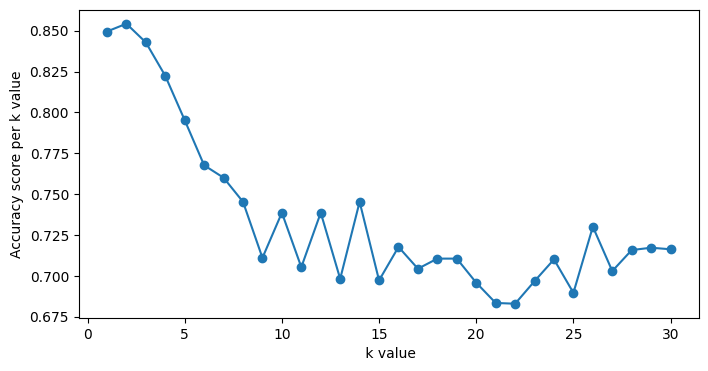

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(n_range,scores,marker="o")
plt.xlabel(" k value")
plt.ylabel("Accuracy score per k value")
plt.show()

In [ ]:
knn_final_model = KNeighborsClassifier(n_neighbors=21)
knn_final_model.fit(x_train,y_train)
y_pred = knn_final_model.predict(x_test)

In [ ]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")

Accuracy score: 0.7301587301587301


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.61      0.70        33
           1       0.67      0.87      0.75        30

    accuracy                           0.73        63
   macro avg       0.75      0.74      0.73        63
weighted avg       0.75      0.73      0.73        63

